In [1]:
from scipy import stats
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

from matplotlib import rcParams
rcParams['figure.figsize'] = [15, 5]

# Confidence intervals

# Interval estimation for population mean

-0.02859 0.10022
0.89345 1.07453


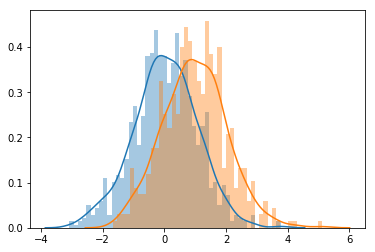

In [2]:
gauss = stats.norm.rvs(loc=0, scale=1, size=1000, random_state=25)
other = stats.norm.rvs(loc=1, scale=1, size=500, random_state=2)

sb.distplot(gauss, bins=50)
sb.distplot(other, bins=50)


# only true, if sigma is known
for case in (gauss, other):
    n, minmax, mean, var, skew, kurt = stats.describe(case)

    alpha = 0.95
    z_min, z_max = stats.norm.interval(alpha, loc=0, scale=1)

    val = np.abs(z_min) * np.abs(np.sqrt(var)) / np.sqrt(n)
    print('{:.5f}'.format(mean - val), '{:.5f}'.format(mean + val))
    
# mean of both distributions is with 95% confidence not the same

In [3]:
# if sigma and mu are not known

for case in (gauss, other):
    n, minmax, mean, var, skew, kurt = stats.describe(case)
    std = case.std(ddof=1) # because mu is not known

    alpha = 0.95
    z_min, z_max = stats.t.interval(alpha, df=n-1, loc=0, scale=1)

    val = np.abs(z_min) * np.abs(std) / np.sqrt(n)
    print('{:.5f}'.format(mean - val), '{:.5f}'.format(mean + val))
    
# mean of both distributions is with 95% confidence not the same

-0.02867 0.10029
0.89322 1.07475


# Interval estimation for proportion of population

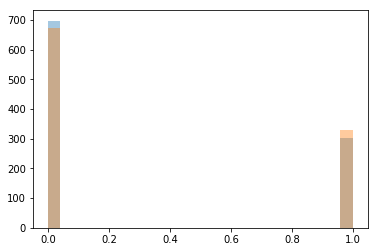

In [4]:
exp1 = stats.bernoulli.rvs(p=0.3, loc=0, size=1000)
exp2 = stats.bernoulli.rvs(p=0.35, loc=0, size=1000)

sb.distplot(exp1, kde=False, bins=25)
sb.distplot(exp2, kde=False, bins=25)

In [5]:
# only true, if sigma is known
# if n large (central limit theorem)

for case in (exp1, exp2):
    n, minmax, mean, var, skew, kurt = stats.describe(case)

    alpha = 0.95
    z_min, z_max = stats.norm.interval(alpha, loc=0, scale=1)

    val = np.abs(z_min) * np.sqrt(mean*(1-mean)/n)
    print('{:.5f}'.format(mean - val), '{:.5f}'.format(mean + val))
    
# mean of both distributions is with 95% confidence not the same

0.27354 0.33046
0.29890 0.35710


# Estimated Error

In [6]:
# What size n of the sample is required, that the error does not exceed E at the stated level of confidence?

alpha = 0.95
z_alpha, _ = stats.norm.interval(alpha, loc=0, scale=1)
sigma = 1 # from observations
error = 0.1 # defined by user

n = (np.abs(z_alpha) * sigma / error)**2
print(n)

384.14588206941244


In [7]:
# for bernoulli

alpha = 0.95
z_alpha, _ = stats.norm.interval(alpha, loc=0, scale=1)

p = 0.3 # substituted from p-hat or using p = 0.5, thus maximizing the equation below
error = 0.01 # defined by user

n = (np.abs(z_alpha) * p * (1-p) /error)**2
print(n)

1694.083339926109


# Interval estimation for Poisson Rate Parameter

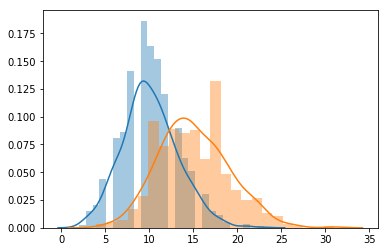

In [8]:
exp1 = stats.poisson.rvs(mu=10, loc=0, size=1000)
exp2 = stats.poisson.rvs(mu=15, loc=0, size=1000)

sb.distplot(exp1)
sb.distplot(exp2)

In [9]:
for case in (exp1, exp2):
    n, minmax, mean, var, skew, kurt = stats.describe(case)

    alpha = 0.95
    z_min, z_max = stats.norm.interval(alpha, loc=0, scale=1)

    val = np.abs(z_min) * np.sqrt(mean /n)
    print('{:.5f}'.format(mean - val), '{:.5f}'.format(mean + val))
    
# mean of both distributions is with 95% confidence not the same

9.91293 10.30707
14.81055 15.29145


# Parameter differences for two populations

## Difference in Means

$\mu^0 = \mu^0_x - \mu^0_y = X^{\mean} - Y^{\mean}$

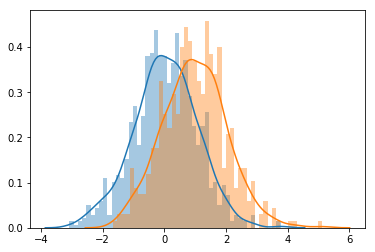

In [10]:
#Case 1: sigma_x^2 and sigma_y^2 known

gauss = stats.norm.rvs(loc=0, scale=1, size=1000, random_state=25)
other = stats.norm.rvs(loc=1, scale=1, size=500, random_state=2)

sb.distplot(gauss, bins=50)
sb.distplot(other, bins=50)

In [11]:
alpha = 0.95
z_min, z_max = stats.norm.interval(alpha, loc=0, scale=1)

val = np.abs(z_min) * np.sqrt(1.0/len(gauss) + 1.0/len(other))
print('{:.5f}'.format(gauss.mean() - other.mean() - val), '{:.5f}'.format(gauss.mean() - other.mean() + val))

# mean of both distributions is with 95% confidence not the same, since zero is not included

-1.05552 -0.84082


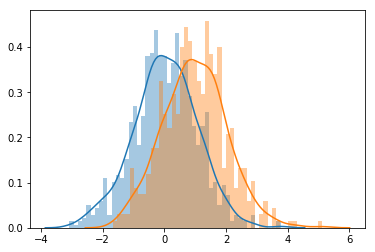

In [12]:
#Case 2: sigma_x^2 and sigma_y^2 unknown, but equal

gauss = stats.norm.rvs(loc=0, scale=1, size=1000, random_state=25)
other = stats.norm.rvs(loc=1, scale=1, size=500, random_state=2)

sb.distplot(gauss, bins=50)
sb.distplot(other, bins=50)

In [13]:
Sp = ((len(gauss)-1)*gauss.var(ddof=1) + (len(other)-1)*other.var(ddof=1)) / (len(gauss) + len(other) - 2)

alpha = 0.95
z_min, z_max = stats.t.interval(alpha, df=len(gauss)+len(other)-2, loc=0, scale=1)

val = Sp*np.sqrt((1/len(gauss)) + (1/len(other))) * np.abs(z_min)

print('{:.5f}'.format(gauss.mean() - other.mean() - val), '{:.5f}'.format(gauss.mean() - other.mean() + val))

# mean of both distributions is with 95% confidence not the same, since zero is not included

-1.06372 -0.83262


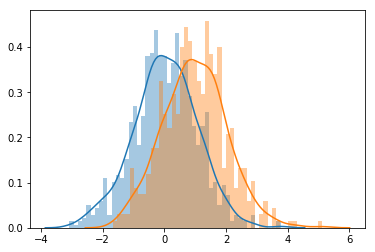

In [14]:
#Case 3: sigma_x^2 and sigma_y^2 unknown and unequal

gauss = stats.norm.rvs(loc=0, scale=1, size=1000, random_state=25)
other = stats.norm.rvs(loc=1, scale=1, size=500, random_state=2)

sb.distplot(gauss, bins=50)
sb.distplot(other, bins=50)

In [15]:
def satterthwaite_app(d1, d2):
    """
    Returns the Satterthwaite approximation.
    
    dist1, dist2: two input populations, e.g., gaussian random variates
    """
    
    Sx, Sy = (d1.var(ddof=1)/len(d1)), (d2.var(ddof=1)/len(d2))
    
    num = (Sx + Sy)**2
    denom = (1/(len(d1)-1) * Sx**2) + (1/(len(d2)-1) * Sy**2)
    return np.floor(num/denom)

In [16]:
nu = satterthwaite_app(gauss, other)

alpha = 0.95
z_min, z_max = stats.t.interval(alpha, df=nu, loc=0, scale=1)

val = np.abs(z_min) * np.sqrt((gauss.var(ddof=1)**2)/len(gauss) + (other.var(ddof=1)**2)/len(other)) 

print('{:.5f}'.format(gauss.mean() - other.mean() - val), '{:.5f}'.format(gauss.mean() - other.mean() + val))

# mean of both distributions is with 95% confidence not the same, since zero is not included

-1.06331 -0.83303


# Difference in Proportion

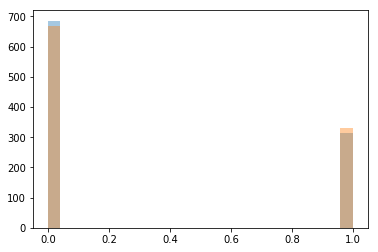

In [17]:
exp1 = stats.bernoulli.rvs(p=0.3, loc=0, size=1000)
exp2 = stats.bernoulli.rvs(p=0.35, loc=0, size=1000)

sb.distplot(exp1, kde=False, bins=25)
sb.distplot(exp2, kde=False, bins=25)

In [18]:
x_y = 0.3 - 0.35

alpha = 0.95
z_alpha, _ = stats.norm.interval(alpha, loc=0, scale=1)

val = np.abs(z_alpha) * np.sqrt( (exp1.mean() * (1-exp1.mean())/1000) + (exp2.mean() * (1-exp2.mean())/1000))

print('{:.5f}'.format(x_y - val), '{:.5f}'.format(x_y + val))
# zero is not contained in the interval, hence, both populations are likely not the same

-0.09095 -0.00905


# Interval Estimation for a Variance

In [19]:
exp = stats.norm.rvs(loc=0, scale=1, size=1000, random_state=25)

num = (len(exp) - 1)*exp.var()
low, high = num/stats.chi2.isf(0.025, df=1000), num/stats.chi2.isf(0.975, df=1000)

print('{:.5f}'.format(low), '{:.5f}'.format(high))
# this is the confidence interval for the variance

0.98901 1.17861


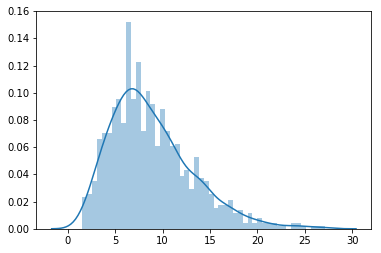

In [20]:
sb.distplot(stats.chi2.rvs(df=9, size=1000), bins=50)

# Estimating the Ratio of two variances

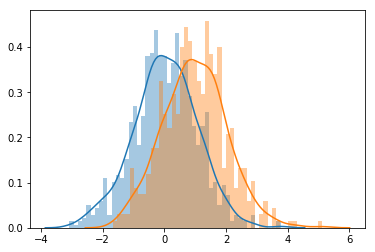

In [21]:
gauss = stats.norm.rvs(loc=0, scale=1, size=1000, random_state=25)
other = stats.norm.rvs(loc=1, scale=1, size=500, random_state=2)

sb.distplot(gauss, bins=50)
sb.distplot(other, bins=50)

In [22]:
var_ratio = (gauss.var()/other.var())**2

alpha = 0.95
q = (1-alpha)/2.0

low, high = var_ratio * stats.f.isf(q=q, dfd=len(gauss)-1, dfn=len(other)-1), \
            var_ratio * 1/stats.f.isf(q=alpha*q, dfd=len(gauss)-1, dfn=len(other)-1)


print('{:.5f}'.format(low), '{:.5f}'.format(high))
# since unity is included, we can be 95% sure, that both variances are approximately the same

1.19220 0.88151
